# Wholesale Customers Data

The dataset can be found [here](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set). The dataset consists of 8 columns, namely:

1. FRESH: Annual spending on fresh products (Continuous);
2. MILK: Annual spending on milk products (Continuous);
3. GROCERY: Annual spending on grocery products (Continuous);
4. FROZEN: Annual spending on frozen products (Continuous)
5. DETERGENTS_PAPER: annual spending on detergents and paper products (Continuous)
6. DELICATESSEN: annual spending on and delicatessen products (Continuous);
7. CHANNEL: customer's Channel - Horeca (Hotel/Restaurant/CafÃ©) channel or Retail channel (Nominal)
8. REGION: customer's Region - Lisbon, Oporto or Other (Nominal)

We will implement the K-Means and then the Agglomerative Clustering algorithms.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Machine Learning/Data Training/Wholesale Customers Dataset/Wholesale_customers.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Shape of the data:

In [3]:
data.shape

(440, 8)

Missing values check:

In [4]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

No missing values. We normalize the data:

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [6]:
normalized_df = pd.DataFrame(data_scaled, columns = data.columns)
normalized_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


## KMeans Clustering

### Elbow Method

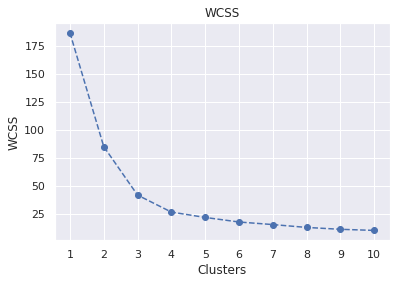

In [7]:
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_validate

WCSS = [] 
for i in range(1, 11): 
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(normalized_df) 
  WCSS.append(kmeans.inertia_)
  
plt.plot(range(1,11), WCSS, 'o--')
plt.xticks(range(1, 11))
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.title('WCSS')
plt.show()

It appears that the number of clusters = 3 would be a good choice since there is significant change in the sum of squares between 2-cluster configuration and 3-cluster configuration.

### Silhouette Analysis

We calculate the Silhouette score, which ranges from -1 to 1. A silhouette score of 1 implies that the clusters and well-distinguished from each other.

In [8]:
from sklearn.metrics import silhouette_score

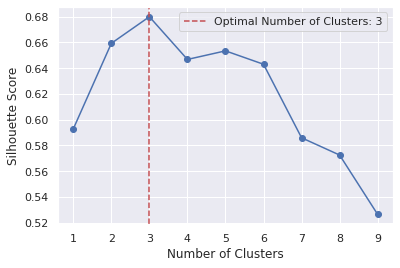

In [9]:
X = normalized_df.values
kmeans_per_k  = [KMeans(n_clusters = i, random_state = 42).fit(X) for i in range(1, 11)]
silhouette_scores = [silhouette_score(X, kmean.labels_) for kmean in kmeans_per_k[1:]]

k = np.argmax(silhouette_scores) + 1
plt.plot(range(1, len(silhouette_scores)+1), silhouette_scores, marker = 'o')
plt.axvline(x = k, linestyle = '--', c = 'r', label = 'Optimal Number of Clusters: {}'.format(k))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

The Silhouette Score confirms that 3 is the optimal number of clusters.

We can find the cluster centers:

In [10]:
kmeans.cluster_centers_

array([[ 1.66533454e-16,  1.00000000e+00,  3.32507730e-01,
         6.69027472e-02,  5.96622229e-02,  1.13177626e-01,
         2.00554475e-02,  5.31091214e-02],
       [ 1.00000000e+00,  1.00000000e+00,  5.96964725e-02,
         2.15485206e-01,  2.54834280e-01,  2.63684176e-02,
         2.53116794e-01,  5.36512307e-02],
       [ 1.00000000e+00,  0.00000000e+00,  4.63405500e-02,
         1.46086080e-01,  1.99068136e-01,  4.20602050e-02,
         2.01407941e-01,  3.89850739e-02],
       [ 2.77555756e-16, -6.66133815e-16,  1.15019922e-01,
         5.19478152e-02,  4.33635017e-02,  5.09881341e-02,
         2.32100094e-02,  2.49093146e-02],
       [ 2.77555756e-16,  5.00000000e-01,  9.69013830e-02,
         2.33237063e-02,  4.36598470e-02,  6.04563705e-02,
         1.10347218e-02,  1.95267232e-02],
       [ 1.00000000e+00,  1.00000000e+00,  8.85855596e-02,
         9.41459363e-02,  1.14667788e-01,  2.26134596e-02,
         1.07710824e-01,  3.15391462e-02],
       [ 1.00000000e+00,  5.000000

We can also find the cluster labels:

In [11]:
kmeans.labels_

array([5, 5, 5, 7, 5, 5, 5, 5, 7, 1, 5, 5, 5, 5, 5, 7, 5, 7, 5, 7, 5, 7,
       0, 1, 5, 5, 7, 7, 1, 0, 7, 7, 7, 0, 7, 5, 0, 5, 1, 0, 0, 7, 5, 1,
       5, 1, 1, 9, 5, 1, 7, 7, 5, 5, 0, 7, 1, 5, 7, 7, 5, 9, 5, 5, 7, 9,
       7, 5, 7, 7, 7, 0, 7, 5, 5, 7, 7, 1, 7, 7, 7, 5, 5, 7, 5, 9, 9, 0,
       7, 0, 7, 7, 1, 0, 5, 7, 5, 7, 7, 7, 5, 5, 5, 0, 7, 7, 5, 1, 5, 1,
       7, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 0, 0, 7, 5, 7, 0, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 7, 7, 1, 7, 7, 7, 0, 7, 7, 7, 7,
       7, 1, 5, 7, 5, 5, 5, 7, 7, 1, 5, 1, 5, 7, 7, 7, 5, 1, 7, 1, 7, 5,
       0, 7, 7, 7, 7, 0, 7, 8, 7, 7, 7, 7, 5, 5, 7, 7, 7, 5, 7, 7, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3,
       3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 2, 3, 2, 3, 3, 3, 3, 0, 7, 7, 0, 7, 7, 5, 7, 5, 0, 0, 0, 0,
       7, 7, 7, 0, 7, 7, 7, 6, 4, 6, 4, 6, 6, 4, 6,

We can store these predictions in the dataset:

In [12]:
kmeans_clustered = normalized_df.copy()
kmeans_clustered['Cluster'] = kmeans.labels_
kmeans_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel           440 non-null    float64
 1   Region            440 non-null    float64
 2   Fresh             440 non-null    float64
 3   Milk              440 non-null    float64
 4   Grocery           440 non-null    float64
 5   Frozen            440 non-null    float64
 6   Detergents_Paper  440 non-null    float64
 7   Delicassen        440 non-null    float64
 8   Cluster           440 non-null    int32  
dtypes: float64(8), int32(1)
memory usage: 29.3 KB


We can visualize any two features and how they are predicted:

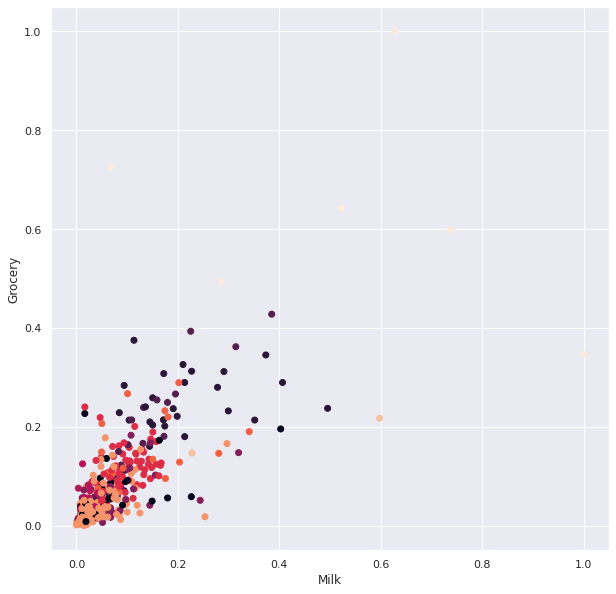

In [13]:
plt.figure(figsize = (10, 10))
plt.scatter(kmeans_clustered['Milk'], kmeans_clustered['Grocery'], c = kmeans.labels_)
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.show()

In [14]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42) 
y_kmeans = kmeans.fit_predict(data_scaled)

### Visualization of Dendrogram
 

Let's visualize the dendrogram for 3 clusters.

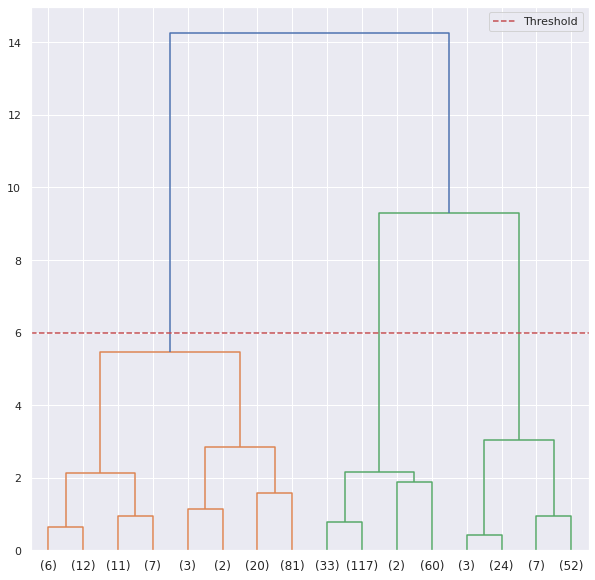

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize = (10, 10))
dendrogram(linkage(normalized_df, method = 'ward'), truncate_mode = 'level', p = 3)
plt.axhline(y = 6, linestyle = '--', color = 'r', label = 'Threshold')
plt.legend()
plt.show()

We find that the two cluster configuration is actually not very bad, considering that the distance between the 4-cluster configuration is small. 

## Agglomerative Clustering

### Dendrogram

We use a Dendrogram to understand the optimal number of clusters.

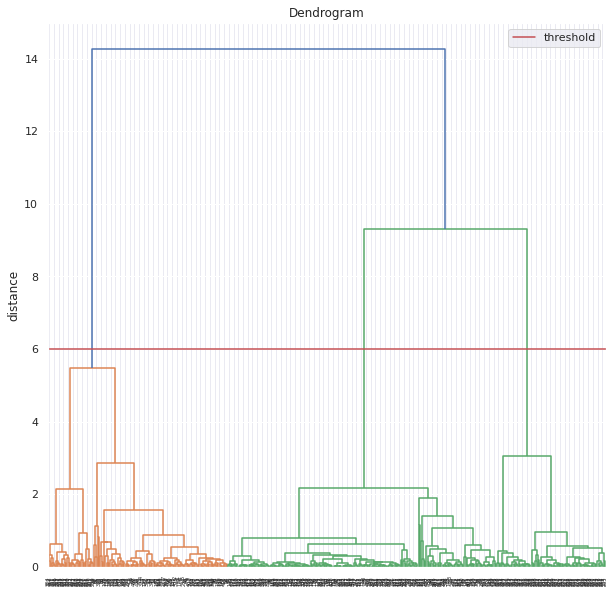

In [16]:
import scipy.cluster.hierarchy as HC
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
plt.title('Dendrogram')
plt.ylabel('distance')
graph = HC.dendrogram(HC.linkage(normalized_df, method = 'ward'))
plt.axhline(y=6, label='threshold', color = 'r')
plt.legend(loc = 'upper right')
plt.show()

We can choose 3 cluster configuration, since that has the largest distance between the splits.

In [17]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')

In [18]:
cluster.fit(normalized_df)
cluster.get_params()

{'affinity': 'euclidean',
 'compute_distances': False,
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'complete',
 'memory': None,
 'n_clusters': 3}

In [19]:
y_pred = cluster.fit_predict(normalized_df)

In [20]:
agglomerative_clustered = normalized_df.copy()
agglomerative_clustered['Cluster'] = cluster.labels_
agglomerative_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel           440 non-null    float64
 1   Region            440 non-null    float64
 2   Fresh             440 non-null    float64
 3   Milk              440 non-null    float64
 4   Grocery           440 non-null    float64
 5   Frozen            440 non-null    float64
 6   Detergents_Paper  440 non-null    float64
 7   Delicassen        440 non-null    float64
 8   Cluster           440 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 31.1 KB


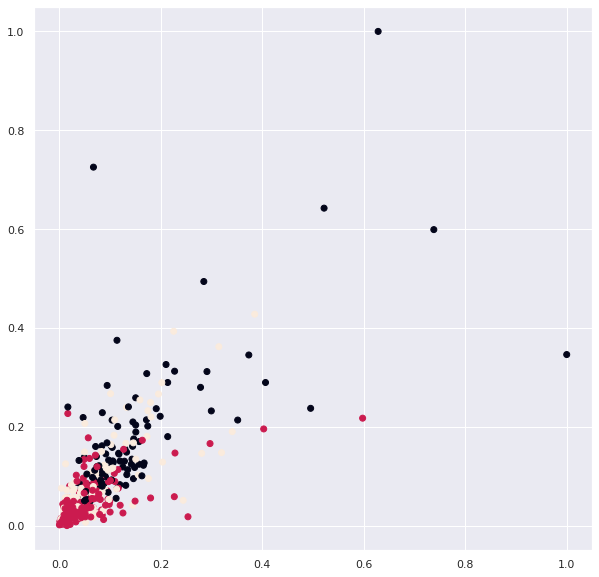

In [21]:
plt.figure(figsize = (10, 10))
plt.scatter(agglomerative_clustered['Milk'], agglomerative_clustered['Grocery'], c = cluster.labels_)
plt.show()

## Conclusion

The Silhouette Score suggests that there 3 is the optimal number of clusters. The dendrogram for Hierarchical Clustering also confirms through the distances between the splits.

# Note

It was noted that the Min-Max Scaler results in an optimal cluster formation of 3. During the experimentation, Scikit-learn's individual sampling to unit norm by the preprocessing method normalize resulted in an optimal number of cluster = 1, which was counterintuitive to the entire attitude of implementing the KMeans algorithm. Thus, choosing the right scaler is an essential part to produce the right results in KMeans and Hierarchical Clustering algorithms.